# **Business Case Study** On Delhivery

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

In [ ]:
import pandas as pd

file_id = "1TURZv8d9sUSLAN0d-YLNP0BOtj4Z-orX"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)

In [ ]:
df = df.replace(to_replace = 'Bangalore', value = 'Bengaluru')

Column Profiling:

* data - tells whether the data is testing or training data

* trip_creation_time - Timestamp of trip creation

* route_schedule_uuid - Unique Id for a particular route schedule

* route_type - Transportation type
    *  FTL - Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    *  Carting: Handling system consisting of small vehicles (carts)

* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

* source_center - Source ID of trip origin

* source_name - Source Name of trip origin

* destination_cente - Destination ID

* destination_name - Destination Name

* od_start_time - Trip start time

* od_end_time - Trip end time

* start_scan_to_end_scan - Time taken to deliver from source to destination

* is_cutoff - Unknown field

* cutoff_factor - Unknown field

* cutoff_timestamp - Unknown field

* actual_distance_to_destination - Distance in Kms between source and destination warehouse

* actual_time - Actual time taken to complete the delivery (Cumulative)

* osrm_time - An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

* osrm_distance - An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

* factor - Unknown field

* segment_actual_time - This is a segment time. Time taken by the subset of the package delivery

* segment_osrm_time - This is the OSRM segment time. Time taken by the subset of the package delivery

* segment_osrm_distance - This is the OSRM distance. Distance covered by subset of the package delivery

* segment_factor - Unknown field

In [ ]:
unknown_columns = [
    'is_cutoff',
    'cutoff_factor',
    'cutoff_timestamp',
    'factor',
    'segment_factor'
]

df = df.drop(columns=unknown_columns)

df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

* Null Values Analysis





In [ ]:
df.isnull().sum().sort_values(ascending=False).to_frame(name="Missing_Values").T

,source_name,destination_name,data,route_schedule_uuid,trip_creation_time,trip_uuid,route_type,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
Missing_Values,293,261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

- Converting time columns into pandas datatime

In [ ]:
df['od_start_time'] =  pd.to_datetime(df['od_start_time'])
df['od_end_time']  =  pd.to_datetime(df['od_end_time'])

In [ ]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

- aggregating at sub-journey level

In [ ]:
segment_agg_rules = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',

    }

In [ ]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment = df.groupby('segment_key').agg(segment_agg_rules).reset_index()
segment = segment.sort_values(by='od_end_time', ascending=True).reset_index()
segment = segment.rename(columns={
    'segment_actual_time': 'segment_actual_time_total',
    'segment_osrm_distance': 'segment_osrm_distance_total',
    'segment_osrm_time': 'segment_osrm_time_total'
})


In [ ]:
segment[segment['trip_uuid'] == 'trip-153671043369099517']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_distance_total,segment_osrm_time_total
2234,5,trip-153671043369099517IND562132AAAIND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0
3028,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


### Calculate time taken between od_start_time and od_end_time and keep it as a feature.

---



* od_time_diff_hour is matching with start_scan_to_end_scan **(od_time_diff_hour = start_scan_to_end_scan)**


In [ ]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / 60

In [ ]:
segment.head(5)

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_distance_total,segment_osrm_time_total,od_time_diff_hour
0,19,trip-153671110078355292IND121004AABIND121001AAA,training,2018-09-12 00:11:40.783923,thanos::sroute:c2ee580f-f4b2-4fa5-98ab-0c5b327...,Carting,trip-153671110078355292,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121001AAA,Faridabad (Haryana),2018-09-12 00:11:40.783923,2018-09-12 00:50:10.814399,38.0,9.396526,17.0,9.0,10.8159,17.0,10.8159,9.0,38.500508
1,17,trip-153671079956500691IND110024AAAIND110014AAA,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,trip-153671079956500691,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),2018-09-12 00:06:39.565253,2018-09-12 00:55:59.568645,49.0,9.872146,23.0,8.0,9.9566,23.0,16.0860,14.0,49.333390
2,13,trip-153671066826362165IND560043AACIND560064AAA,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,trip-153671066826362165,IND560043AAC,HBR Layout PC (Karnataka),IND560064AAA,Bengaluru_NwYlhnka_DC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 01:13:03.560690,68.0,10.071263,25.0,18.0,13.8433,25.0,13.8433,18.0,68.588279
3,33,trip-153671173668736946IND110043AAAIND110078AAA,training,2018-09-12 00:22:16.687619,thanos::sroute:7734a02c-9376-4767-a1b5-15897a7...,Carting,trip-153671173668736946,IND110043AAA,Delhi_Nangli_IP (Delhi),IND110078AAA,Janakpuri (Delhi),2018-09-12 00:22:16.687619,2018-09-12 01:29:19.277412,67.0,12.756768,44.0,21.0,18.7668,43.0,22.6548,25.0,67.043163
4,58,trip-153671277074687197IND624001AAAIND624619AAA,training,2018-09-12 00:39:30.747127,thanos::sroute:42969f47-47af-4473-9f2c-cf747fe...,FTL,trip-153671277074687197,IND624001AAA,Dindigul_Central_D_1 (Tamil Nadu),IND624619AAA,Oddnchtram_Palani_D (Tamil Nadu),2018-09-12 00:39:30.747127,2018-09-12 01:32:05.649177,52.0,26.534938,40.0,26.0,27.8573,40.0,27.8572,26.0,52.581701


In [ ]:
trip_agg_rules = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_total' : 'sum',
    'segment_osrm_distance_total' : 'sum',
    'segment_osrm_time_total' : 'sum',

    }

In [ ]:
trip = segment.groupby('trip_uuid').agg(trip_agg_rules).reset_index(drop = True)

In [ ]:
trip.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_distance_total,segment_osrm_time_total
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [ ]:
trip[['actual_time', 'segment_actual_time_total']]

,actual_time,segment_actual_time_total
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [ ]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_distance_total,segment_osrm_time_total
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [ ]:
trip[trip['trip_uuid'] == 'trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_distance_total,segment_osrm_time_total
5917,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195.0,195.386819,82.981842,170.0,89.0,107.4515,167.0,102.7106,88.0


In [ ]:
#hypothesis testing

## Distance Hypotheses

**Null Hypothesis (H0):**  
There is no significant difference between the actual distance and the OSRM distance.  
**Alternative Hypothesis (H1):**  
The actual distance is greater than the OSRM distance.  


## Time Hypotheses

**Null Hypothesis (H0):**  
There is no significant difference between the actual time and the OSRM time.  

**Alternative Hypothesis (H1):**  
The actual time is greater than the OSRM time.  


In [ ]:
import scipy.stats as stats

trip_sample = trip.sample(1000)

# Normality check for distance differences
distance_diff = trip_sample['actual_distance_to_destination'] - trip_sample['osrm_distance']
stat, p_dist = stats.shapiro(distance_diff.sample(1000, replace=False))
print(f"Shapiro-Wilk p-value (distance difference): {p_dist}")

# Normality check for time differences
time_diff = trip_sample['actual_time'] - trip_sample['osrm_time']
stat, p_time = stats.shapiro(time_diff.sample(1000, replace=False))
print(f"Shapiro-Wilk p-value (time difference): {p_time}")


Shapiro-Wilk p-value (distance difference): 1.9874761793144895e-45
Shapiro-Wilk p-value (time difference): 3.031957726638202e-44


### Both distance and time difference distributions are not normally distributed, so they do not meet the paired t-test assumptions.

In [ ]:
trip[['actual_distance_to_destination','osrm_distance']].head()

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918


In [ ]:
from scipy.stats import wilcoxon

# Two-sided Wilcoxon (default)
stat, p_value = wilcoxon(
    trip_sample['actual_distance_to_destination'],
    trip_sample['osrm_distance']
)

print("stat:", stat)
print("p_value:", p_value)

if p_value < 0.05:
    print("Conclusion: There is a significant difference between actual distance and OSRM distance.")
else:
    print("Conclusion: There is no significant difference between actual distance and OSRM distance.")


stat: 0.0
p_value: 3.325859118934513e-165
Conclusion: There is a significant difference between actual distance and OSRM distance.


**Conclusion: There is a significant difference between actual distance and OSRM distance.**

In [ ]:
trip[['actual_time','osrm_time']].head(5)

,actual_time,osrm_time
0,1562.0,717.0
1,143.0,68.0
2,3347.0,1740.0
3,59.0,15.0
4,341.0,117.0
...,...,...
14782,83.0,62.0
14783,21.0,12.0
14784,282.0,48.0
14785,264.0,179.0


In [ ]:
from scipy.stats import ttest_rel, wilcoxon

stat, p_value = wilcoxon(
    trip['actual_time'],
    trip['osrm_time'],
    alternative='greater'
)

print("stat:", stat)
print("p_value:", p_value)

if p_value > 0.05:
    print("Conclusion: There is no significant difference between the actual time and the OSRM time.")
else:
    print("Conclusion: The actual time is greater than the OSRM time.")

stat: 108914306.5
p_value: 0.0
Conclusion: The actual time is greater than the OSRM time.


**Conclusion: The actual time is greater than the OSRM time.**

## **Insights Generation**- Busiest route, popular route, emerging route

In [ ]:
trip['destination_name'] = trip['destination_name'].str.lower()
trip['source_name'] = trip['source_name'].str.lower()

In [ ]:
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending

def place2city(x):
    # We will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]

    #Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' or city == 'mumbai hub' : return 'mumbai'


    return city

def place2city_place(x):

    # We will remove state
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]


    # Now we need to deal with edge cases or imporper name convention

    return x.split(' ')[0]


def place2code(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'


In [ ]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [ ]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']].head()

,destination_state,destination_city,destination_place,destination_code
0,haryana,gurgaon,bilaspur,hb
1,karnataka,chikblapur,shntisgr,d
2,punjab,chandigarh,mehmdpur,h
3,maharashtra,mumbai,mirard,ip
4,karnataka,bellary,bellary,none


In [ ]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

In [ ]:
trip[['source_state', 'source_city', 'source_place', 'source_code']].head()

,source_state,source_city,source_place,source_code
0,madhya pradesh,bhopal,trnsport,h
1,karnataka,tumkur,veersagr,i
2,karnataka,bangalore,nelmngla,h
3,maharashtra,mumbai hub,mumbai,none
4,karnataka,bellary,bellary,none


In [ ]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_distance_total,segment_osrm_time_total,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,route
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,bhopal_trnsport_h (madhya pradesh),IND000000ACB,gurgaon_bilaspur_hb (haryana),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,haryana,gurgaon,bilaspur,hb,madhya pradesh,bhopal,trnsport,h,madhya pradesh_bhopal → haryana_gurgaon
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND562101AAA,chikblapur_shntisgr_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,karnataka,chikblapur,shntisgr,d,karnataka,tumkur,veersagr,i,karnataka_tumkur → karnataka_chikblapur
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,bangalore_nelmngla_h (karnataka),IND160002AAC,chandigarh_mehmdpur_h (punjab),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,punjab,chandigarh,mehmdpur,h,karnataka,bangalore,nelmngla,h,karnataka_bangalore → punjab_chandigarh
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none,maharashtra_mumbai hub → maharashtra_mumbai
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583101AAA,bellary_dc (karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,karnataka,bellary,bellary,none,karnataka,bellary,bellary,none,karnataka_bellary → karnataka_bellary


In [ ]:
trip['route'] = (
   trip['source_state'] + "_" + trip['source_city'] + " → " + trip['destination_state'] + "_" + trip['destination_city']
)

In [ ]:
trip.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_distance_total,segment_osrm_time_total,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,route
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,bhopal_trnsport_h (madhya pradesh),IND000000ACB,gurgaon_bilaspur_hb (haryana),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,haryana,gurgaon,bilaspur,hb,madhya pradesh,bhopal,trnsport,h,madhya pradesh_bhopal → haryana_gurgaon
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND562101AAA,chikblapur_shntisgr_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,karnataka,chikblapur,shntisgr,d,karnataka,tumkur,veersagr,i,karnataka_tumkur → karnataka_chikblapur
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,bangalore_nelmngla_h (karnataka),IND160002AAC,chandigarh_mehmdpur_h (punjab),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,punjab,chandigarh,mehmdpur,h,karnataka,bangalore,nelmngla,h,karnataka_bangalore → punjab_chandigarh


In [ ]:
# Busiest Cities

In [ ]:
busiest_city = trip['source_city'].value_counts()

# Get top 10 busiest cities overall
top_10_busiest_cities = busiest_city.sort_values(ascending=False).head(10)


In [ ]:
top_10_busiest_cities.head(10)

,count
source_city,
bengaluru,1094
gurgaon,1013
bhiwandi,811
bangalore,755
delhi,617
mumbai,592
hyderabad,562
pune,479
chandigarh,418


### Busiest Routes

In [ ]:
busiest_routes = trip['route'].value_counts().sort_values(ascending=False)

In [ ]:
busiest_routes.head(10)

,count
route,
karnataka_bengaluru → karnataka_bengaluru,686
karnataka_bangalore → karnataka_bengaluru,477
telangana_hyderabad → telangana_hyderabad,398
karnataka_bengaluru → karnataka_bangalore,342
maharashtra_bhiwandi → maharashtra_mumbai,332
maharashtra_mumbai → maharashtra_mumbai,279
haryana_gurgaon → delhi_delhi,240
maharashtra_pune → maharashtra_pune,237
maharashtra_mumbai hub → maharashtra_mumbai,227


### Checking round trips

In [ ]:
# 1. Exclude intra-state movements
mask_interstate = trip['source_state'] != trip['destination_state']

# 2. Forward counts: A → B
forward_df = (
    trip[mask_interstate]
    .groupby(['source_state', 'destination_state'])['trip_uuid']
    .count()
    .reset_index()
)
forward_df.columns = ['from_state', 'to_state', 'forward_count']

# 3. Reverse counts: B → A
reverse_df = forward_df.rename(columns={
    'from_state': 'to_state',
    'to_state': 'from_state',
    'forward_count': 'reverse_count'
})

# 4. Merge forward with reverse
merged_route_flow = forward_df.merge(
    reverse_df,
    on=['from_state', 'to_state'],
    how='left'
)

# 5. Fill missing reverse counts with 0
merged_route_flow['reverse_count'] = merged_route_flow['reverse_count'].fillna(0).astype(int)

In [ ]:
imbalanced_routes = merged_route_flow[
    merged_route_flow['forward_count'] > merged_route_flow['reverse_count']
].copy()

imbalanced_routes['imbalance'] = (
    imbalanced_routes['forward_count'] - imbalanced_routes['reverse_count']
)

imbalanced_routes = imbalanced_routes.sort_values(
    by='imbalance',
    ascending=False
)


In [ ]:
imbalanced_routes.head(10)

,from_state,to_state,forward_count,reverse_count,imbalance
18,delhi,haryana,396,311,85
44,haryana,punjab,82,45,37
69,madhya pradesh,haryana,49,18,31
48,haryana,uttar pradesh,93,71,22
78,maharashtra,haryana,44,22,22
80,maharashtra,karnataka,33,11,22
84,maharashtra,telangana,52,31,21
45,haryana,rajasthan,70,51,19
14,chandigarh,punjab,47,28,19
5,assam,arunachal pradesh,23,4,19


### Emerging Routes by City (For Future)

By apply the linear regression method to find: emerging cites

## Insights - busiest month, day, week

In [ ]:
trip['trip_creation_time'] =  pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [ ]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']].head()

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2


In [ ]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']].nunique()

,0
trip_year,1
trip_month,2
trip_hour,24
trip_day,22
trip_week,4
trip_dayofweek,7


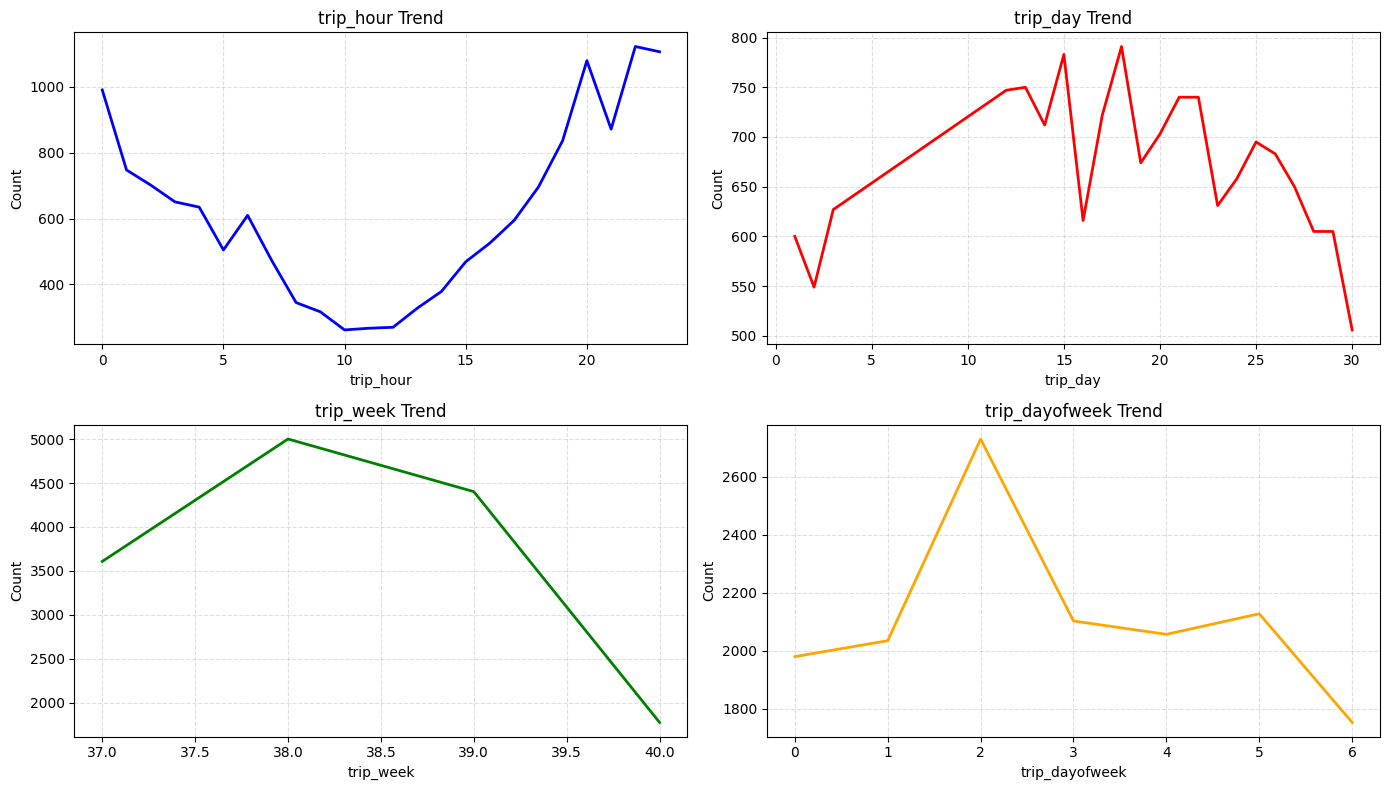

In [ ]:
import matplotlib.pyplot as plt

# Pick different colors for each chart
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

columns = ['trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']

for i, col in enumerate(columns):
    trip[col].value_counts().sort_index().plot(
        ax=axes[i],
        color=colors[i],
        linewidth=2
    )
    axes[i].set_title(f'{col} Trend')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

### Find outliers in numerical variable

In [ ]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_total', 'segment_osrm_distance_total',
            'segment_osrm_time_total', 'od_time_diff_hour']

In [ ]:
trip[num_cols].head(2)

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_distance_total,segment_osrm_time_total,od_time_diff_hour
0,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,2260.109800
1,180.0,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,181.611874


<Axes: >

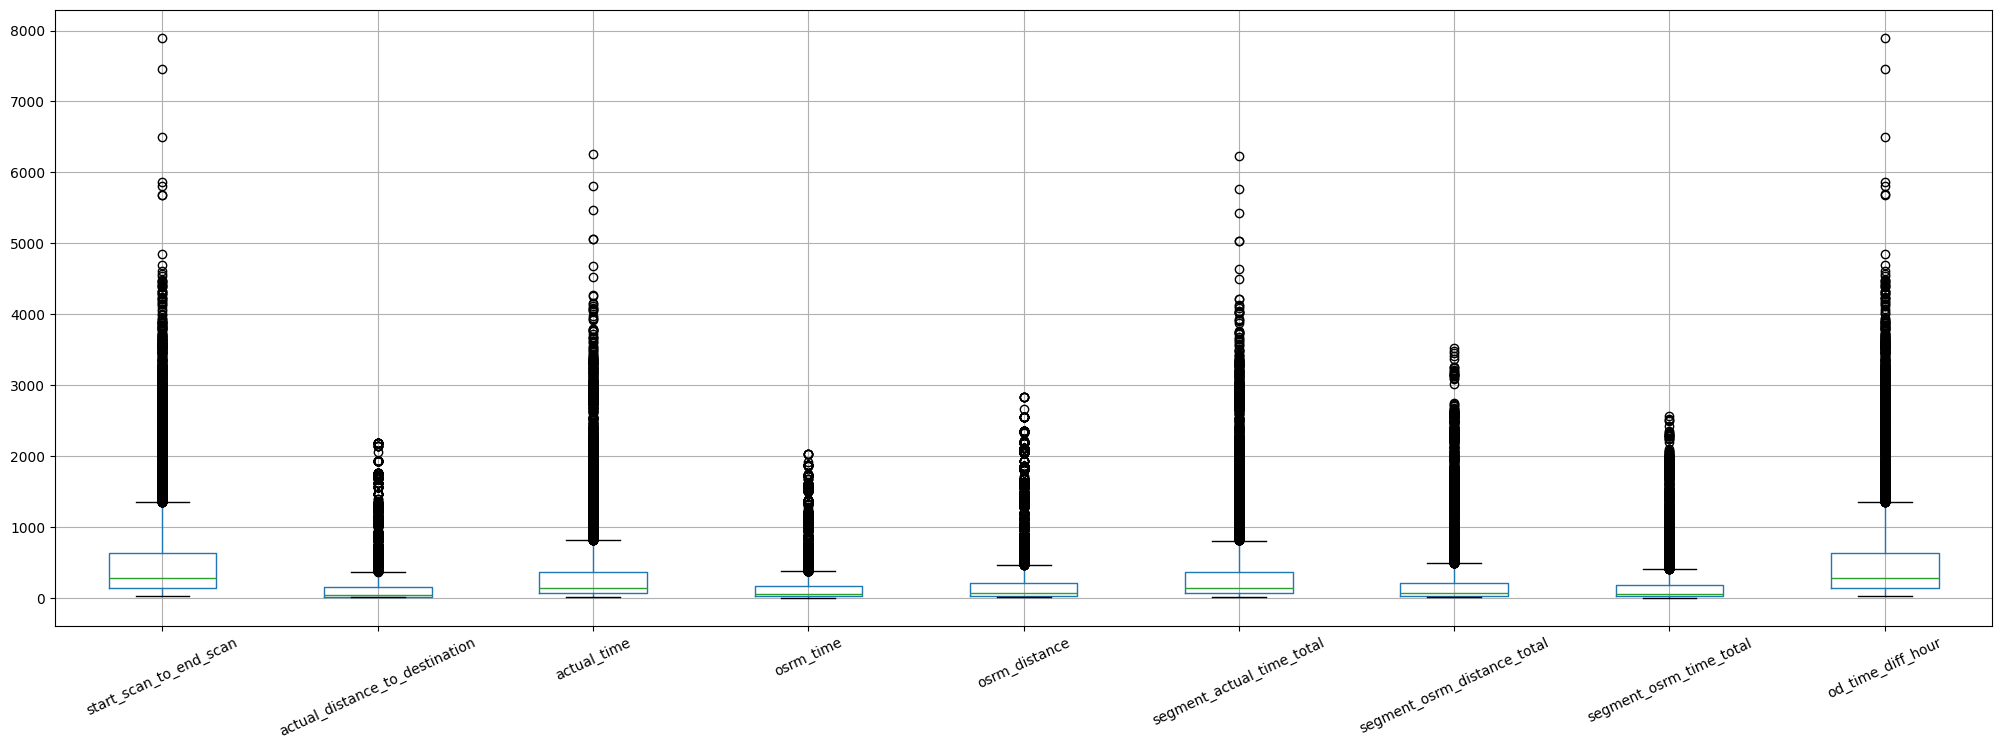

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

### Handle the outliers using IQR method

In [ ]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [ ]:
IQR

,0
start_scan_to_end_scan,483.000000
actual_distance_to_destination,140.814159
actual_time,300.000000
osrm_time,139.000000
osrm_distance,175.887300
segment_actual_time_total,298.000000
segment_osrm_distance_total,183.981750
segment_osrm_time_total,154.000000
od_time_diff_hour,483.839201


In [ ]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

In [ ]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_total,segment_osrm_distance_total,segment_osrm_time_total,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,route,route_state,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND562101AAA,chikblapur_shntisgr_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,karnataka,chikblapur,shntisgr,d,karnataka,tumkur,veersagr,i,karnataka_tumkur → karnataka_chikblapur,karnataka → karnataka,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none,maharashtra_mumbai hub → maharashtra_mumbai,maharashtra → maharashtra,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583101AAA,bellary_dc (karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,karnataka,bellary,bellary,none,karnataka,bellary,bellary,none,karnataka_bellary → karnataka_bellary,karnataka → karnataka,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600116AAB,chennai_porur_dpc (tamil nadu),IND602105AAB,chennai_sriperumbudur_dc (tamil nadu),189.0,190.487849,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0,tamil nadu,chennai,sriperumbudur,dc,tamil nadu,chennai,porur,dpc,tamil nadu_chennai → tamil nadu_chennai,tamil nadu → tamil nadu,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,98.005634,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0,tamil nadu,chennai,vandalur,dc,tamil nadu,chennai,chrompet,dpc,tamil nadu_chennai → tamil nadu_chennai,tamil nadu → tamil nadu,2018,9,0,12,37,2


<Axes: >

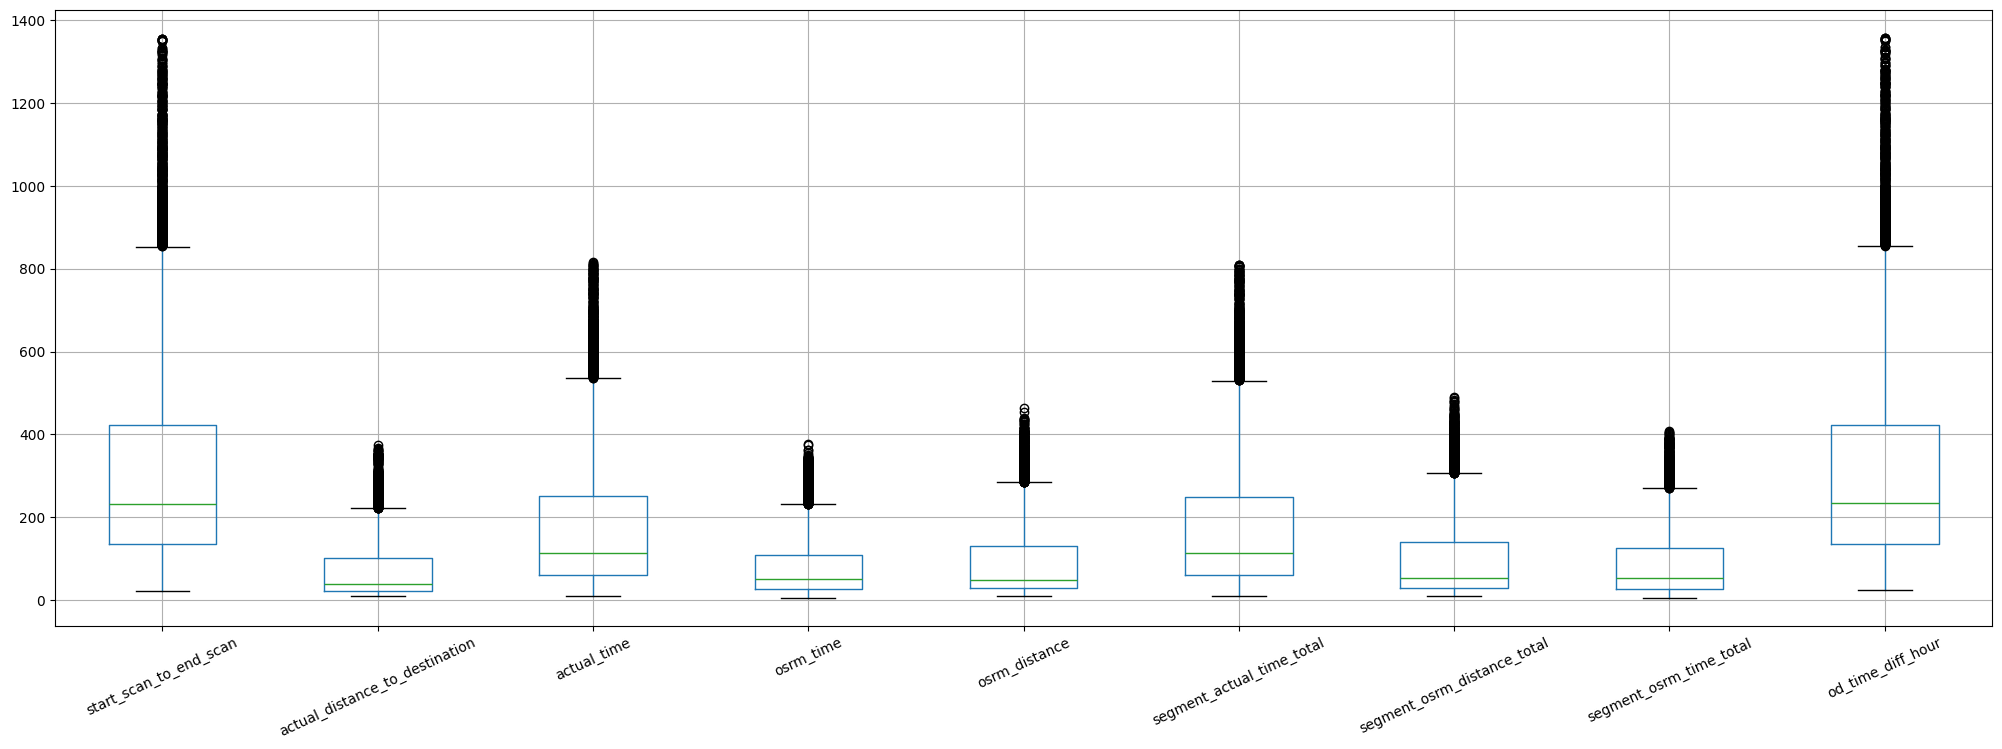

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(25,8)) # rot means rotation x-axis label by 25 degree

## **Insights :-**

* Actual time and distance consistently differ from OSRM-predicted time and distance, indicating OSRM estimates are not aligned with real trip behavior.

* Bengaluru is the busiest city by a large margin.

* Gurgaon, Mumbai, and Bhiwandi form the next cluster of high activity.

* Bangalore vs Bengaluru suggests inconsistent naming

* Bengaluru dominates volume — The top two routes are Bengaluru↔Bengaluru/Bangalore with 1,163+ shipments, indicating very high intra-city movement or duplication of city naming.

* Hyderabad has strong intra-city traffic — 398 shipments occur entirely within Hyderabad.

* Mumbai region movement is split across hubs — Bhiwandi ↔ Mumbai and Mumbai ↔ Mumbai account for 600+ shipments.

* Gurgaon → Delhi is a significant corridor — 240 shipments indicate heavy NCR cross-city movement.

* Delhi → Haryana is the biggest imbalance lane with high volume (396 vs 311), indicating stronger outbound flow from Delhi.

* Haryana has multiple imbalanced outbound lanes (to Punjab, UP, Rajasthan), showing Haryana is a major feeder state.



* trip_hour (Hourly Trend)
    * Very low demand from 9 AM-12 PM.

    * Demand starts rising after 3 PM.

    * Peak activity between 8 PM-11 PM, showing strong evening operations.

* trip_day (Day of Month Trend)
    * Volumes rise steadily from the 5th to the 15th.

    * Mid-month spikes on days 15-18.

    * Demand drops noticeably after the 25th.

* trip_week (Weekly Trend)
    * Trips increase into Week 38 (highest).

    * Week 39 shows slight drop but still strong.

    * Week 40 has a major decline — sudden fall in weekly volume.

* trip_dayofweek (Weekday Trend)
    * Highest demand on Wednesday (day 2).

    * Monday & Tuesday are moderate.

## **Business Recommendations :-**

* **Refine or recalibrate the OSRM prediction algorithm** using actual trip data to improve the accuracy of distance and time estimations.

1. **Increase fleet and service capacity in Bengaluru** As Bengaluru is your busiest city by a large margin. Expanding fleet availability, offering premium/express services, and improving hub operations here will immediately capture more demand and boost revenue.

2. **Strengthen key high-volume corridors (Gurgaon-Mumbai-Bhiwandi)**
These cities have a lot of trips. Improve pricing, reduce empty return trips, and focus on big customers on these routes to increase profit and grow revenue.

3. **Strengthen intra-city operations in Bengaluru** — consider micro-hubs or route consolidation because it's your highest-volume region.

4. **Optimize Hyderabad last-mile capacity** — stable high intra-city volume justifies dedicated vehicles or zone-based routing.

5. **Increase capacity Delhi → Haryana** during peak hours; this lane has real volume demand.

6. **Optimize return loads Haryana → Delhi** to reduce empty miles (reverse flow exists but weaker).

7. **Hourly Operations**
    * Deploy more fleet & manpower between 6 PM-11 PM due to heavy demand.

    * Reduce staff or consolidate trips in the 9 AM-12 PM low window.

    * Schedule maintenance or vehicle downtime in low-hour periods.

8. **Day-of-Week Strategy**
    * Wednesday peak → allocate extra sorters, loaders, and delivery vehicles.

    * Sunday lowest → reduce operational footprint (skeleton crew).

    * Shift non-critical operations (maintenance, audits, training) to Sundays.

9. **Prepare operational capacity for the upcoming festival season**, as the demand trend shows clear volume spikes during specific weeks